In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Spam Detection Project/Spam_Detection_Dataset_5572.csv', encoding='latin-1')

In [ ]:
df.head(25)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.shape

(5572, 2)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    text = ' '.join([word for word in tokens if word not in stop_words])
    text = re.sub(' +', ' ', text)
    return text
df['v2'] = df['v2'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head(10)

,v1,v2
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though
5,spam,freemsg hey darling 3 weeks word back id like ...
6,ham,even brother like speak treat like aids patent
7,ham,per request melle melle oru minnaminunginte nu...
8,spam,winner valued network customer selected receiv...
9,spam,mobile 11 months u r entitled update latest co...


In [ ]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

        v1                                                 v2
102    ham  per request melle melle oru minnaminunginte nu...
153    ham  per request melle melle oru minnaminunginte nu...
206    ham  entered cabin pa said happy bday boss felt spe...
222    ham                               sorry ill call later
325    ham                          callsmessagesmissed calls
...    ...                                                ...
5535   ham  know thinkin malaria relax children cant handl...
5539   ham                                sleepingand surfing
5547  spam  contract mobile 11 mnths latest motorola nokia...
5553   ham                               hahahause brain dear
5558   ham                               sorry ill call later

[457 rows x 2 columns]
Number of duplicate rows: 457


In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.shape

(5115, 2)

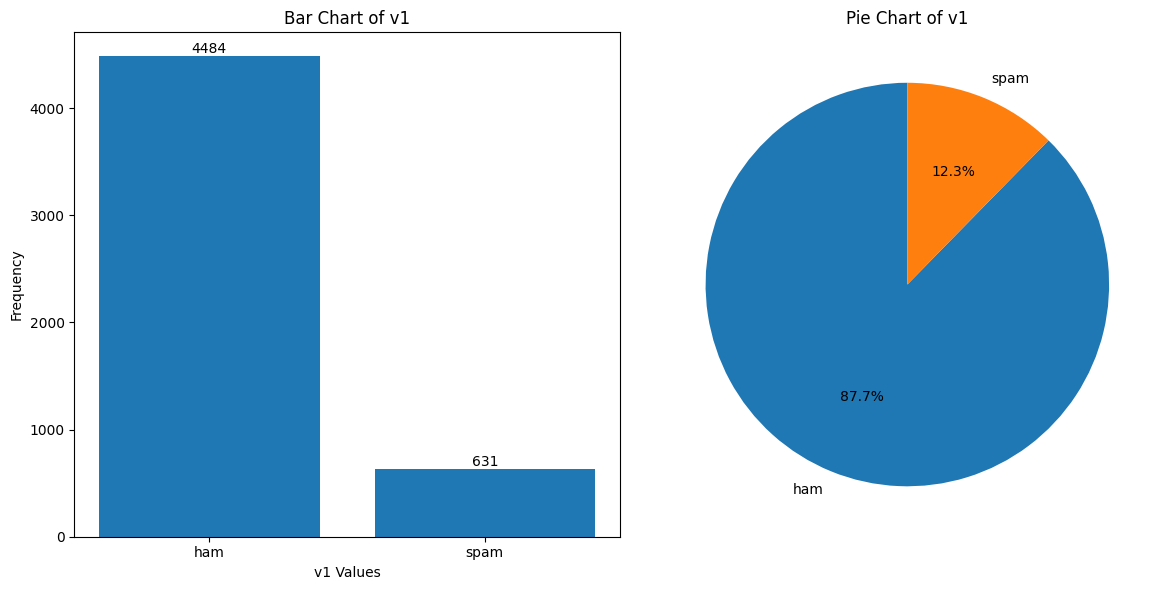

In [ ]:
import matplotlib.pyplot as plt
v1_counts = df['v1'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
ax1.bar(v1_counts.index, v1_counts.values)
ax1.set_title('Bar Chart of v1')
ax1.set_xlabel('v1 Values')
ax1.set_ylabel('Frequency')
for i, v in enumerate(v1_counts.values):
    ax1.text(i, v + 5, str(v), ha='center', va='bottom')  # Adjust position as needed
ax2.pie(v1_counts, labels=v1_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Pie Chart of v1')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['v1_encoded'] = label_encoder.fit_transform(df['v1'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame with 'v1_encoded' (target) and 'v2' (text) columns

# 1. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1_encoded'], test_size=0.2, random_state=78)  # Adjust test_size and random_state as needed

# 2. Create TF-IDF vectors
vectorizer = TfidfVectorizer()  # You can customize parameters here
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Multinomial Naive Bayes
mnb_model = MultinomialNB()
mnb_model.fit(X_train_tfidf, y_train)
mnb_predictions = mnb_model.predict(X_test_tfidf)
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
print(f"MultinomialNB Accuracy: {mnb_accuracy}")

# Bernoulli Naive Bayes
bnb_model = BernoulliNB()
bnb_model.fit(X_train_tfidf, y_train)
bnb_predictions = bnb_model.predict(X_test_tfidf)
bnb_accuracy = accuracy_score(y_test, bnb_predictions)
print(f"BernoulliNB Accuracy: {bnb_accuracy}")

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)  # Adjust max_iter if needed
lr_model.fit(X_train_tfidf, y_train)
lr_predictions = lr_model.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy}")

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=78)  # Adjust parameters as needed
rf_model.fit(X_train_tfidf, y_train)
rf_predictions = rf_model.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

# XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=78)  # Adjust parameters as needed
xgb_model.fit(X_train_tfidf, y_train)
xgb_predictions = xgb_model.predict(X_test_tfidf)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")

#SVC
svc_model = SVC(random_state=78)
svc_model.fit(X_train_tfidf, y_train)
svc_predictions = svc_model.predict(X_test_tfidf)
svc_accuracy = accuracy_score(y_test, svc_predictions)
print(f"SVC Accuracy: {svc_accuracy}")

# MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=78)  # Adjust parameters as needed
mlp_model.fit(X_train_tfidf, y_train)
mlp_predictions = mlp_model.predict(X_test_tfidf)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
print(f"MLPClassifier Accuracy: {mlp_accuracy}")

# AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=78)  # Adjust parameters as needed
adaboost_model.fit(X_train_tfidf, y_train)
adaboost_predictions = adaboost_model.predict(X_test_tfidf)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print(f"AdaBoost Accuracy: {adaboost_accuracy}")

MultinomialNB Accuracy: 0.9560117302052786
BernoulliNB Accuracy: 0.9599217986314761
Logistic Regression Accuracy: 0.9540566959921799
Random Forest Accuracy: 0.9628543499511242
XGBoost Accuracy: 0.9648093841642229
SVC Accuracy: 0.9687194525904204
MLPClassifier Accuracy: 0.9794721407624634
AdaBoost Accuracy: 0.9384164222873901


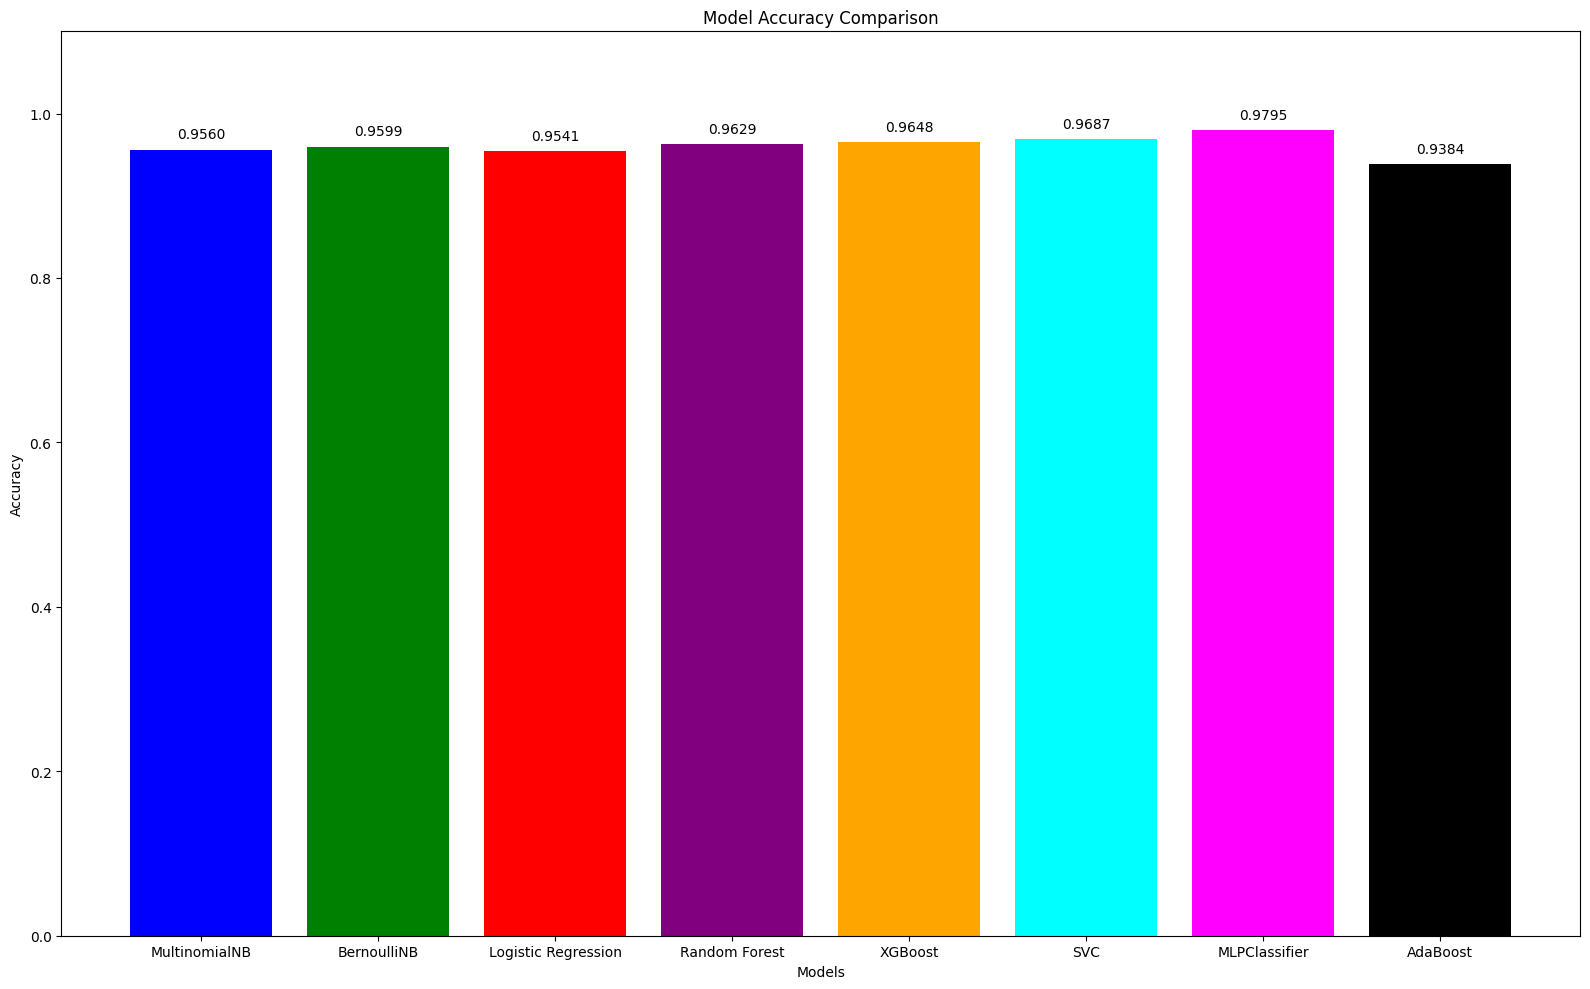

In [ ]:
import matplotlib.pyplot as plt

model_names = ['MultinomialNB', 'BernoulliNB', 'Logistic Regression', 'Random Forest', 'XGBoost', 'SVC', 'MLPClassifier', 'AdaBoost']
model_accuracies = [mnb_accuracy, bnb_accuracy, lr_accuracy, rf_accuracy, xgb_accuracy, svc_accuracy, mlp_accuracy, adaboost_accuracy]
plt.figure(figsize=(16, 10))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'black'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
for i, v in enumerate(model_accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()

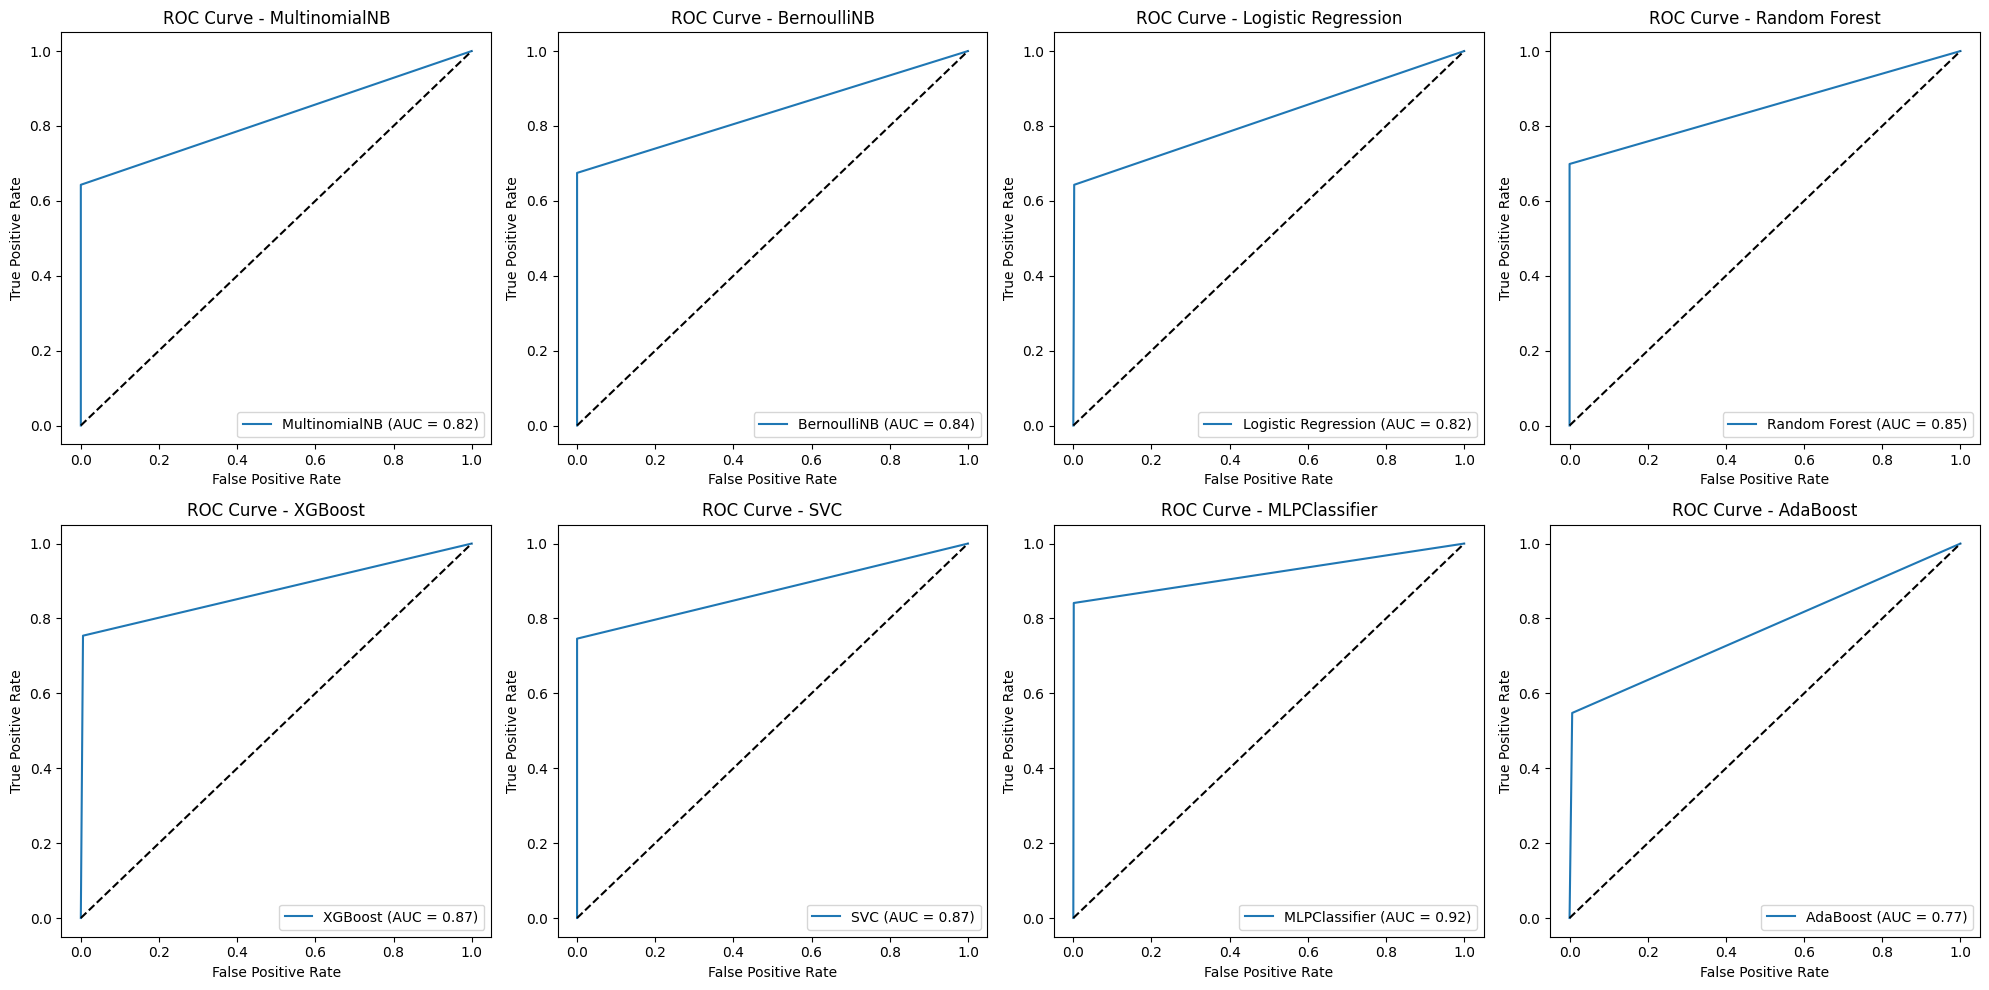

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have your models and predictions from the previous code

model_names = ['MultinomialNB', 'BernoulliNB', 'Logistic Regression', 'Random Forest', 'XGBoost', 'SVC', 'MLPClassifier', 'AdaBoost']
models = [mnb_model, bnb_model, lr_model, rf_model, xgb_model, svc_model, mlp_model, adaboost_model]
predictions = [mnb_predictions, bnb_predictions, lr_predictions, rf_predictions, xgb_predictions, svc_predictions, mlp_predictions, adaboost_predictions]

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns
axes = axes.ravel()  # Flatten the axes array

# Plot ROC curves for each model
for i, (model_name, model, prediction) in enumerate(zip(model_names, models, predictions)):
    fpr, tpr, thresholds = roc_curve(y_test, prediction)
    roc_auc = auc(fpr, tpr)

    axes[i].plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    axes[i].plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC Curve - {model_name}')
    axes[i].legend(loc='lower right')

plt.tight_layout()
plt.show()

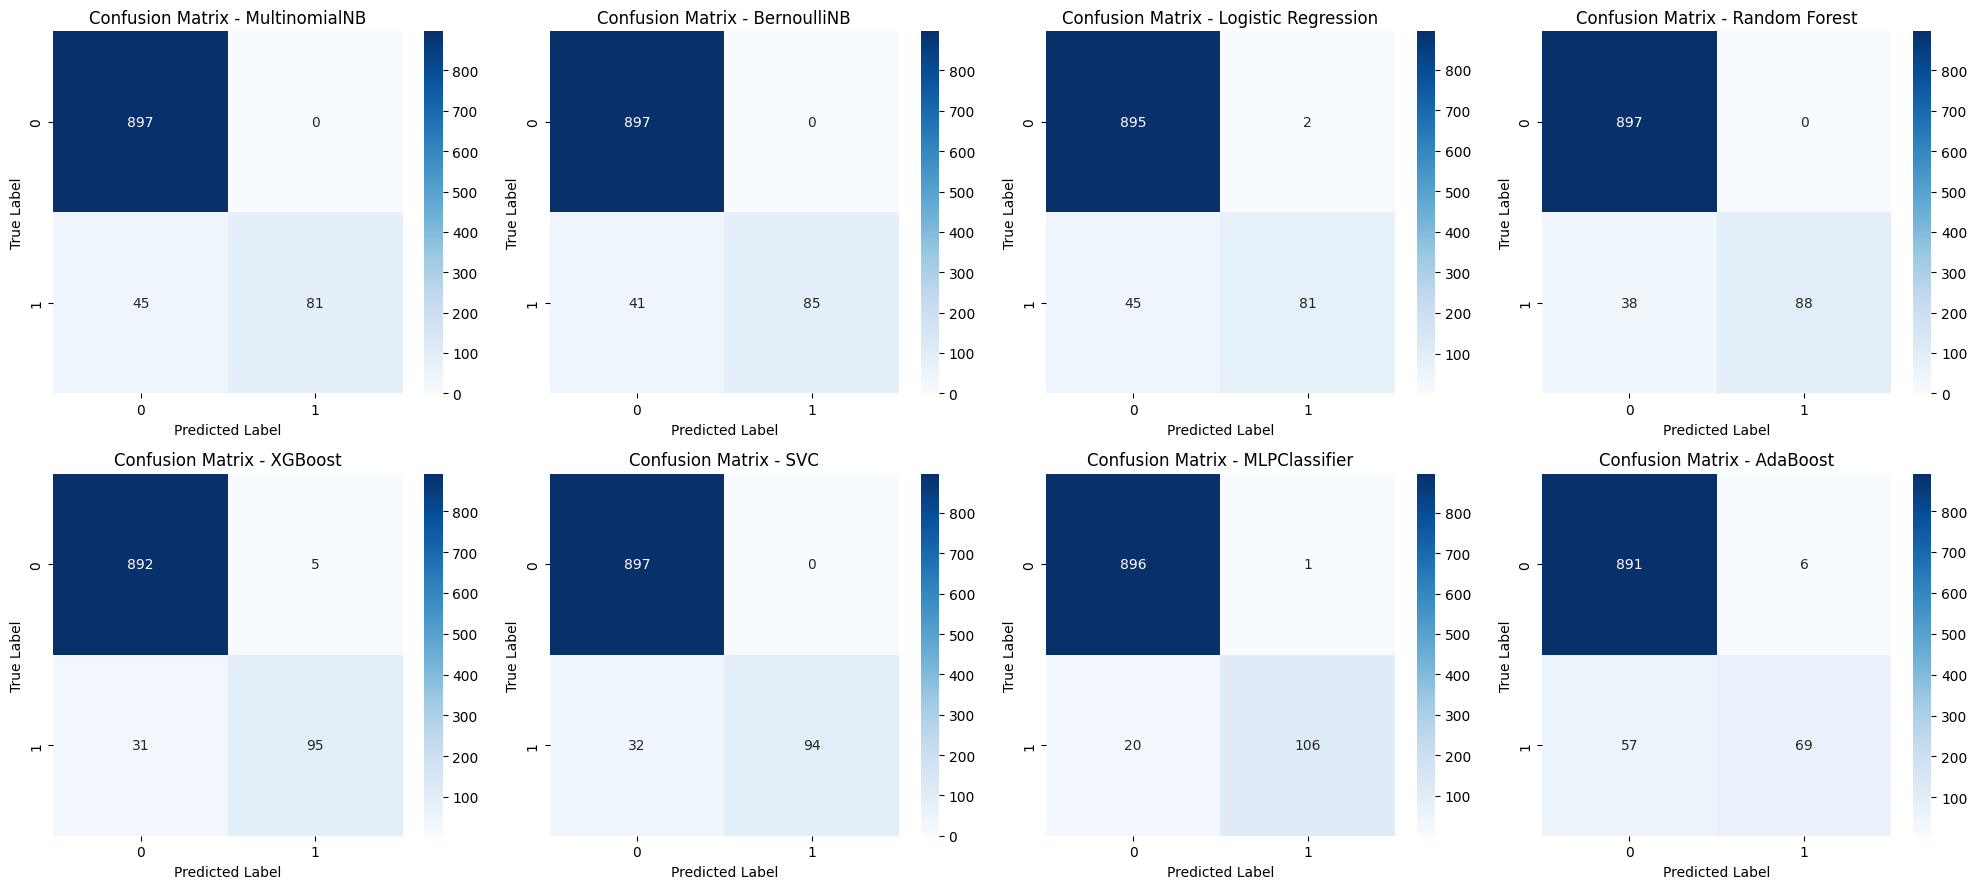

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

model_names = ['MultinomialNB', 'BernoulliNB', 'Logistic Regression', 'Random Forest', 'XGBoost', 'SVC', 'MLPClassifier', 'AdaBoost']
models = [mnb_model, bnb_model, lr_model, rf_model, xgb_model, svc_model, mlp_model, adaboost_model]
predictions = [mnb_predictions, bnb_predictions, lr_predictions, rf_predictions, xgb_predictions, svc_predictions, mlp_predictions, adaboost_predictions]

fig, axes = plt.subplots(2, 4, figsize=(20, 9))
axes = axes.ravel()

for i, (model_name, model, prediction) in enumerate(zip(model_names, models, predictions)):
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {model_name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()